
# Seasonal weather anomalies

The exercise is to create a four-panel plot showing the seasonal temperature anomalies for winter, spring, summer, and autumn for the years 1909–2019.  

In [2]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Task 1
Read the provided data file using pandas and convert missing data to NA values.



In [3]:
# Read data and specify the "-9999" character for NoData values
df = pd.read_csv("data/NOAA_data.txt")
# Displaying the first few rows of the DataFrame
df.head()

,STATION STATION_NAME DATE TAVG TMAX TMIN
0,----------------- ----------------------------...
1,GHCND:FI000007501 ...
2,GHCND:FI000007501 ...
3,GHCND:FI000007501 ...
4,GHCND:FI000007501 ...


In [4]:
#opted to use readfwf instead of read_csv to read the data
#Readfwf is for fixed-width formatted files
df = pd.read_fwf("data/NOAA_data.txt")
# Display the first few rows of the DataFrame
df.head()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN
0,-----------------,----------------------------------------------...,--------,--------,--------,--------
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,-9999,2,-37
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,-9999,6,-26
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,-9999,7,-27
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,-9999,-3,-27


In [5]:
#Exploring the data
df.columns

Index(['STATION', 'STATION_NAME', 'DATE', 'TAVG', 'TMAX', 'TMIN'], dtype='object')

In [12]:
#Read the data again with the correct column names and needed columns plus removing the -9999
df = pd.read_fwf("data/NOAA_data.txt", 
                usecols=['STATION_NAME', 'DATE', 'TAVG', 'TMAX', 'TMIN'],
                na_values=["-9999"])
df.head()

,STATION_NAME,DATE,TAVG,TMAX,TMIN
0,----------------------------------------------...,--------,--------,--------,--------
1,SODANKYLA-AWS-FI,19080101,NaN,2,-37
2,SODANKYLA-AWS-FI,19080102,NaN,6,-26
3,SODANKYLA-AWS-FI,19080103,NaN,7,-27
4,SODANKYLA-AWS-FI,19080104,NaN,-3,-27


In [13]:
#Removing the first row of the data frame
#The first row is a header row that we don't need
df = df.drop(index=0)
df.head()

,STATION_NAME,DATE,TAVG,TMAX,TMIN
1,SODANKYLA-AWS-FI,19080101,NaN,2,-37
2,SODANKYLA-AWS-FI,19080102,NaN,6,-26
3,SODANKYLA-AWS-FI,19080103,NaN,7,-27
4,SODANKYLA-AWS-FI,19080104,NaN,-3,-27
5,SODANKYLA-AWS-FI,19080105,NaN,4,-36


In [14]:
#Investigating the data types of the columns
df.dtypes

STATION_NAME    object
DATE            object
TAVG            object
TMAX            object
TMIN            object
dtype: object

### Task 2 : Filling in the missing data
 in the missing values in the `TAVG` column with your estimates of the average daily temperature as noted above in the data section. You can then drop any average daily temperatures that are still missing

In [15]:
#converting values to numeric
df['TAVG'] = pd.to_numeric(df['TAVG'], errors='coerce')
df['TMAX'] = pd.to_numeric(df['TMAX'], errors='coerce')
df['TMIN'] = pd.to_numeric(df['TMIN'], errors='coerce')
# Display the data types of the columns again
df.dtypes

STATION_NAME     object
DATE             object
TAVG            float64
TMAX            float64
TMIN            float64
dtype: object

In [16]:
#calculating the mean temperature from tmax and tmin
df['TMEAN'] = (df['TMAX'] + df['TMIN']) / 2
# Display the first few rows of the DataFrame
df

,STATION_NAME,DATE,TAVG,TMAX,TMIN,TMEAN
1,SODANKYLA-AWS-FI,19080101,NaN,2.0,-37.0,-17.5
2,SODANKYLA-AWS-FI,19080102,NaN,6.0,-26.0,-10.0
3,SODANKYLA-AWS-FI,19080103,NaN,7.0,-27.0,-10.0
4,SODANKYLA-AWS-FI,19080104,NaN,-3.0,-27.0,-15.0
5,SODANKYLA-AWS-FI,19080105,NaN,4.0,-36.0,-16.0
...,...,...,...,...,...,...
41061,SODANKYLA-AWS-FI,20201003,47.0,51.0,NaN,NaN
41062,SODANKYLA-AWS-FI,20201004,43.0,47.0,37.0,42.0
41063,SODANKYLA-AWS-FI,20201005,42.0,NaN,37.0,NaN
41064,SODANKYLA-AWS-FI,20201006,45.0,46.0,43.0,44.5


In [17]:
#replacing na values in TAVG with the Tmean of the column
df['TAVG'].fillna(df['TMEAN'], inplace=True)
df

,STATION_NAME,DATE,TAVG,TMAX,TMIN,TMEAN
1,SODANKYLA-AWS-FI,19080101,-17.5,2.0,-37.0,-17.5
2,SODANKYLA-AWS-FI,19080102,-10.0,6.0,-26.0,-10.0
3,SODANKYLA-AWS-FI,19080103,-10.0,7.0,-27.0,-10.0
4,SODANKYLA-AWS-FI,19080104,-15.0,-3.0,-27.0,-15.0
5,SODANKYLA-AWS-FI,19080105,-16.0,4.0,-36.0,-16.0
...,...,...,...,...,...,...
41061,SODANKYLA-AWS-FI,20201003,47.0,51.0,NaN,NaN
41062,SODANKYLA-AWS-FI,20201004,43.0,47.0,37.0,42.0
41063,SODANKYLA-AWS-FI,20201005,42.0,NaN,37.0,NaN
41064,SODANKYLA-AWS-FI,20201006,45.0,46.0,43.0,44.5


### Task 3
Define and use a function to convert temperatures in Fahrenheit to Celsius.

In [18]:
def fahr_to_celcius(temp_farhenheit):
    """Converts temperatures from  Fahrenheit to Celsius.

    Parameters
    ----------
    temp_celsius: float | int
    Input temperature in Fahrenheit in float.
    Returns
    Temperature in celcius (integer)"""

    # Convert the Celsius into Fahrenheit
    converted_temp = (temp_farhenheit - 32) * 5/9
    # Round the result to the nearest integer
    converted_temp = round(converted_temp)

    return converted_temp

In [19]:
#testing the function
fahr_to_celcius(32)

0

In [20]:
#Applying the function to the TAVG column
df["Temp_Celcius"] = fahr_to_celcius(df['TAVG'])
df

,STATION_NAME,DATE,TAVG,TMAX,TMIN,TMEAN,Temp_Celcius
1,SODANKYLA-AWS-FI,19080101,-17.5,2.0,-37.0,-17.5,-28.0
2,SODANKYLA-AWS-FI,19080102,-10.0,6.0,-26.0,-10.0,-23.0
3,SODANKYLA-AWS-FI,19080103,-10.0,7.0,-27.0,-10.0,-23.0
4,SODANKYLA-AWS-FI,19080104,-15.0,-3.0,-27.0,-15.0,-26.0
5,SODANKYLA-AWS-FI,19080105,-16.0,4.0,-36.0,-16.0,-27.0
...,...,...,...,...,...,...,...
41061,SODANKYLA-AWS-FI,20201003,47.0,51.0,NaN,NaN,8.0
41062,SODANKYLA-AWS-FI,20201004,43.0,47.0,37.0,42.0,6.0
41063,SODANKYLA-AWS-FI,20201005,42.0,NaN,37.0,NaN,6.0
41064,SODANKYLA-AWS-FI,20201006,45.0,46.0,43.0,44.5,7.0


### Task 4 
Calculate seasonal average temperatures for each season in every year (e.g., Winter 1909, Spring 1909, Summer 1909, ...)

The seasons should include the following months:

- Winter: December, January, February
- Spring: March, April, May
- Summer: June, July, August
- Autumn: September, October, November

In [21]:
#converting the DATE column to datetime format
df['DATE2'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
df

,STATION_NAME,DATE,TAVG,TMAX,TMIN,TMEAN,Temp_Celcius,DATE2
1,SODANKYLA-AWS-FI,19080101,-17.5,2.0,-37.0,-17.5,-28.0,1908-01-01
2,SODANKYLA-AWS-FI,19080102,-10.0,6.0,-26.0,-10.0,-23.0,1908-01-02
3,SODANKYLA-AWS-FI,19080103,-10.0,7.0,-27.0,-10.0,-23.0,1908-01-03
4,SODANKYLA-AWS-FI,19080104,-15.0,-3.0,-27.0,-15.0,-26.0,1908-01-04
5,SODANKYLA-AWS-FI,19080105,-16.0,4.0,-36.0,-16.0,-27.0,1908-01-05
...,...,...,...,...,...,...,...,...
41061,SODANKYLA-AWS-FI,20201003,47.0,51.0,NaN,NaN,8.0,2020-10-03
41062,SODANKYLA-AWS-FI,20201004,43.0,47.0,37.0,42.0,6.0,2020-10-04
41063,SODANKYLA-AWS-FI,20201005,42.0,NaN,37.0,NaN,6.0,2020-10-05
41064,SODANKYLA-AWS-FI,20201006,45.0,46.0,43.0,44.5,7.0,2020-10-06


In [22]:
#creating a new dataframe with the date and temperature columns
data = df[['DATE2', 'Temp_Celcius']]
#changing column names
data.columns = ['DATE', 'TAVG']
data

,DATE,TAVG
1,1908-01-01,-28.0
2,1908-01-02,-23.0
3,1908-01-03,-23.0
4,1908-01-04,-26.0
5,1908-01-05,-27.0
...,...,...
41061,2020-10-03,8.0
41062,2020-10-04,6.0
41063,2020-10-05,6.0
41064,2020-10-06,7.0


In [23]:
#grouping the data by year and month
data['Year'] = data['DATE'].dt.year
data['Month'] = data['DATE'].dt.month
# Display the first few rows of the DataFrame
data

C:\Users\memok\AppData\Local\Temp\ipykernel_34200\407270019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['DATE'].dt.year
C:\Users\memok\AppData\Local\Temp\ipykernel_34200\407270019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['DATE'].dt.month


,DATE,TAVG,Year,Month
1,1908-01-01,-28.0,1908,1
2,1908-01-02,-23.0,1908,1
3,1908-01-03,-23.0,1908,1
4,1908-01-04,-26.0,1908,1
5,1908-01-05,-27.0,1908,1
...,...,...,...,...
41061,2020-10-03,8.0,2020,10
41062,2020-10-04,6.0,2020,10
41063,2020-10-05,6.0,2020,10
41064,2020-10-06,7.0,2020,10


In [24]:
#creating a new column for the season
winter = data[(data['Month'] == 12) | (data['Month'] <= 2)]
winter['Season'] = 'Winter'

spring = data[(data['Month'] >= 3) & (data['Month'] <= 5)]
spring['Season'] = 'Spring'

summer = data[(data['Month'] >= 6) & (data['Month'] <= 8)]
summer['Season'] = 'Summer'

fall = data[(data['Month'] >= 9) & (data['Month'] <= 11)]
fall['Season'] = 'Fall'

# Concatenate the seasonal DataFrames
data = pd.concat([winter, spring, summer, fall], ignore_index=True)
data

C:\Users\memok\AppData\Local\Temp\ipykernel_34200\2386850481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter['Season'] = 'Winter'
C:\Users\memok\AppData\Local\Temp\ipykernel_34200\2386850481.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spring['Season'] = 'Spring'
C:\Users\memok\AppData\Local\Temp\ipykernel_34200\2386850481.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,DATE,TAVG,Year,Month,Season
0,1908-01-01,-28.0,1908,1,Winter
1,1908-01-02,-23.0,1908,1,Winter
2,1908-01-03,-23.0,1908,1,Winter
3,1908-01-04,-26.0,1908,1,Winter
4,1908-01-05,-27.0,1908,1,Winter
...,...,...,...,...,...
41060,2020-10-03,8.0,2020,10,Fall
41061,2020-10-04,6.0,2020,10,Fall
41062,2020-10-05,6.0,2020,10,Fall
41063,2020-10-06,7.0,2020,10,Fall


In [25]:
#grouping the data by season and year
#calculate the mean temperature
grouped = data.groupby(['Year', 'Season'])['TAVG'].mean().reset_index()
# Display the first few rows of the DataFrame
grouped

,Year,Season,TAVG
0,1908,Fall,-1.818182
1,1908,Spring,-2.356322
2,1908,Summer,11.411111
3,1908,Winter,-12.310345
4,1909,Fall,-0.182927
...,...,...,...
447,2019,Winter,-11.400000
448,2020,Fall,7.702703
449,2020,Spring,-0.826087
450,2020,Summer,14.428571


### Task 5 
Calculate seasonal average temperatures for the reference period 1951-1980 (e.g., 4 values in total, one for each season)


In [33]:
#defining the time period of interest
# Filter the DataFrame for the years 1951 to 1980
seasonal = grouped[(grouped['Year'] >= 1951) & (grouped['Year'] <= 1980)]
seasonal

,Year,Season,TAVG
172,1951,Fall,-0.230769
173,1951,Spring,-2.782609
174,1951,Summer,11.771739
175,1951,Winter,-13.922222
176,1952,Fall,-1.758242
...,...,...,...
287,1979,Winter,-14.477778
288,1980,Fall,-2.791209
289,1980,Spring,-2.141304
290,1980,Summer,13.239130


In [34]:
seasonal_average = seasonal.groupby('Season')['TAVG'].mean().reset_index()
seasonal_average

,Season,TAVG
0,Fall,-0.813838
1,Spring,-2.334743
2,Summer,12.394203
3,Winter,-13.554461


### Task 6
Calculate seasonal temperature anomalies for each year


In [36]:
#Exploring the range of the data
T_range = grouped.groupby('Season')['TAVG'].describe().reset_index()
T_range

,Season,count,mean,std,min,25%,50%,75%,max
0,Fall,113.0,-0.394932,1.933438,-4.600000,-1.439560,-0.384615,0.879121,7.702703
1,Spring,113.0,-1.979405,1.921218,-7.250000,-3.438202,-2.021739,-0.434783,2.097826
2,Summer,113.0,12.460991,1.174201,9.891304,11.554348,12.413043,13.217391,14.989130
3,Winter,113.0,-12.863569,2.929950,-23.533333,-14.744444,-12.310345,-10.978022,-6.571429


In [52]:
#Anomaly calculation
# From above code in task 5 we have the seasonal averages from 1951 to 1980
# Now we can calculate the anomalies for each season using these averages
for season in ['Winter', 'Spring', 'Summer', 'Fall']:
    # Calculate the seasonal average for the current season
    seasonal_avg = seasonal_average[seasonal_average['Season'] == season]['TAVG'].values[0]
    
    # Calculate the anomaly for the current season
    grouped.loc[grouped['Season'] == season, 'Anomaly'] = grouped['TAVG'] - seasonal_avg

grouped.head()

,Year,Season,TAVG,Anomaly
0,1908,Fall,-1.818182,-1.004344
1,1908,Spring,-2.356322,-0.021579
2,1908,Summer,11.411111,-0.983092
3,1908,Winter,-12.310345,1.244116
4,1909,Fall,-0.182927,0.630911


### Task 7
Plot the data as shown in the example above

In [51]:
#grouping the data by season
wintertemp= grouped[grouped['Season'] == 'Winter']
springtemp= grouped[grouped['Season'] == 'Spring']
summertemp= grouped[grouped['Season'] == 'Summer']
falltemp= grouped[grouped['Season'] == 'Fall']

wintertemp.head()

,Year,Season,TAVG,Anomaly
3,1908,Winter,-12.310345,1.244116
7,1909,Winter,-11.604938,1.949522
11,1910,Winter,-9.426230,4.128231
15,1911,Winter,-11.670886,1.883575
19,1912,Winter,-18.717647,-5.163186


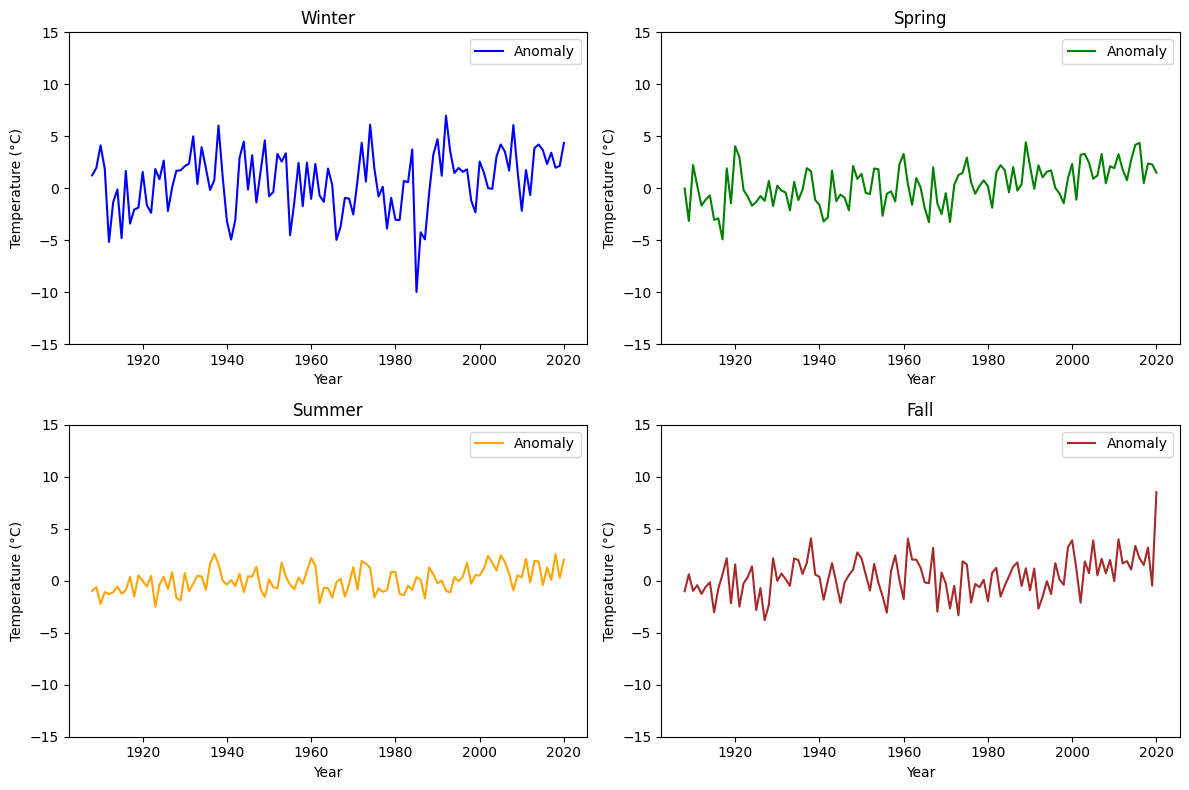

In [ ]:
#plotting the data
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Set plot line width
line_width = 1.5

# Define axes names for each subplot
ax11 = axs[0][0]
ax12 = axs[0][1]
ax21 = axs[1][0]
ax22 = axs[1][1]

#set max and minimum temperature anomalies
Min_temp= -15.0
Max_temp= 15

wintertemp.plot(ax=ax11, x='Year', y='Anomaly', kind='line', color='blue', ylim=[Min_temp, Max_temp], linewidth=line_width)
springtemp.plot(ax=ax12, x='Year',  y='Anomaly', kind='line', color='green', ylim=[Min_temp, Max_temp], linewidth=line_width)
summertemp.plot(ax=ax21, x='Year', y='Anomaly', kind='line', color='orange', ylim=[Min_temp, Max_temp], linewidth=line_width)
falltemp.plot(ax=ax22, x='Year',  y='Anomaly', kind='line', color='brown', ylim=[Min_temp, Max_temp], linewidth=line_width)

# Set the title and labels for each subplot
ax11.set_title('Winter')
ax12.set_title('Spring')
ax21.set_title('Summer')
ax22.set_title('Fall')
ax11.set_ylabel('Temperature (°C)')
ax12.set_ylabel('Temperature (°C)')
ax21.set_ylabel('Temperature (°C)')
ax22.set_ylabel('Temperature (°C)')

# Show the plot
plt.tight_layout()
plt.show()